In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data = data.drop(columns = ['Loan_ID'], axis = 1)

In [6]:
data.shape

(614, 12)

In [7]:
# filling nan values

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [8]:
data.isna().sum().sum()

0

### Visualization for categorical data

In [9]:
data.LoanAmount.value_counts()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64

In [10]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
data_cat = data[['Gender','Married','Education','Self_Employed','Property_Area','Dependents','Credit_History',
                 'Loan_Status','Loan_Amount_Term']]

The value counts for Gender is

Male      502
Female    112
Name: Gender, dtype: int64 



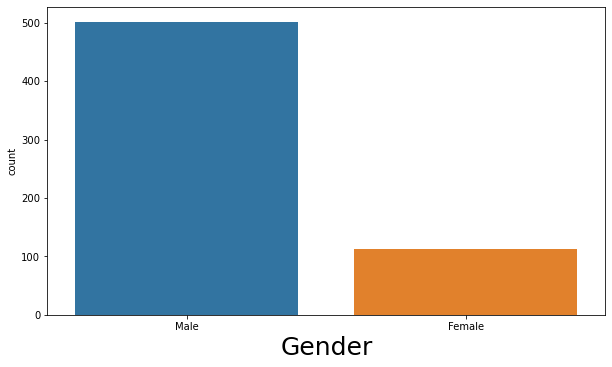

The value counts for Married is

Yes    401
No     213
Name: Married, dtype: int64 



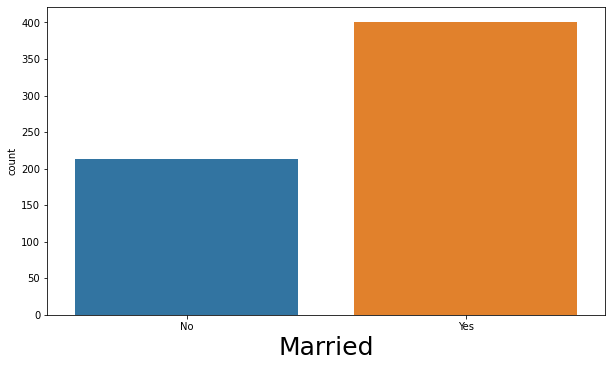

The value counts for Education is

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 



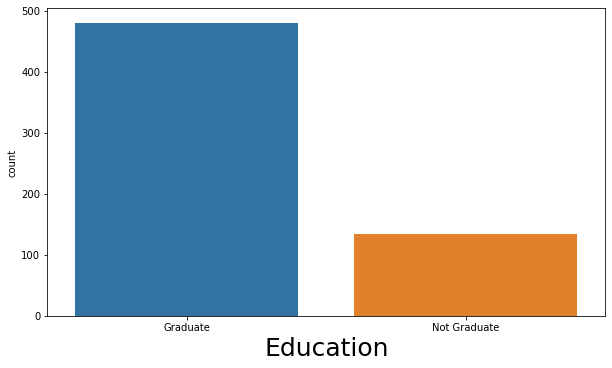

The value counts for Self_Employed is

No     532
Yes     82
Name: Self_Employed, dtype: int64 



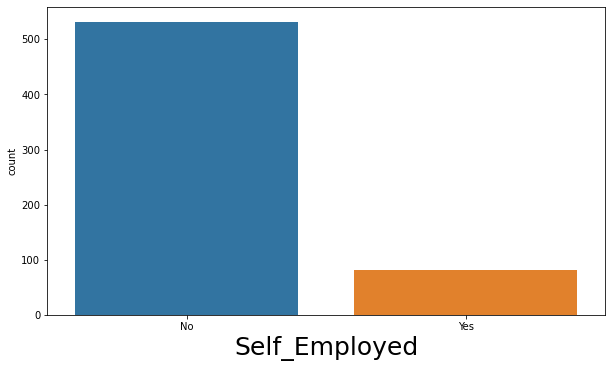

The value counts for Property_Area is

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 



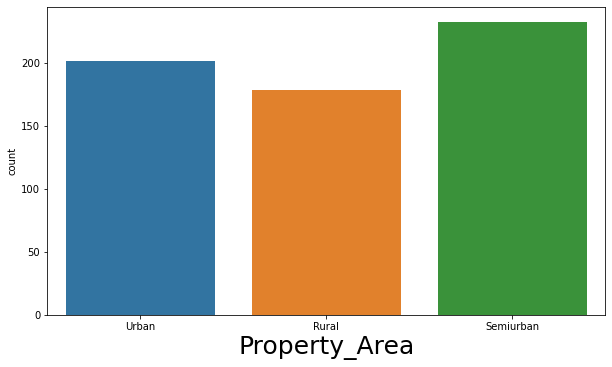

The value counts for Dependents is

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64 



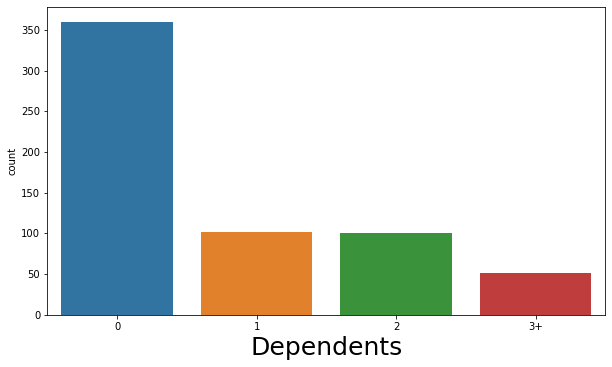

The value counts for Credit_History is

1.0    525
0.0     89
Name: Credit_History, dtype: int64 



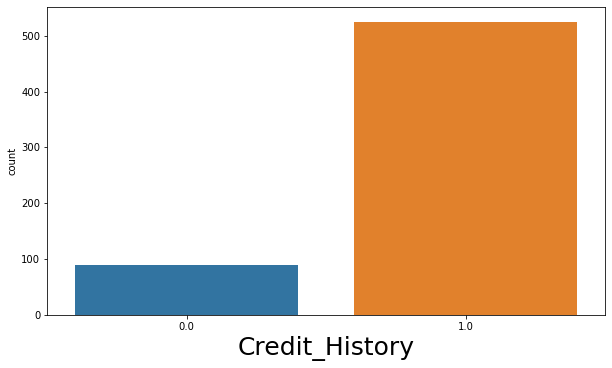

The value counts for Loan_Status is

Y    422
N    192
Name: Loan_Status, dtype: int64 



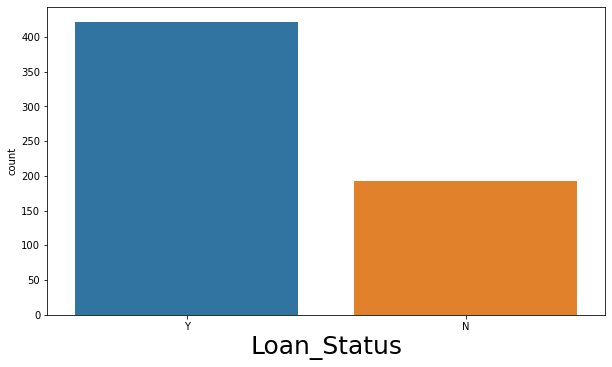

The value counts for Loan_Amount_Term is

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64 



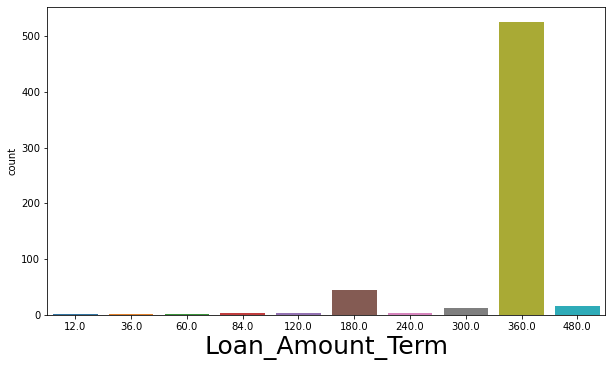

In [12]:
plotnumber = 1

for column in data_cat :
    plt.figure(figsize = (10,60))
    if plotnumber <=9:
        ax = plt.subplot(9,1,plotnumber)
        sns.countplot(data_cat[column])
        plt.xlabel(column,fontsize = 25)
        print(f"The value counts for {column} is\n")
        print(data_cat[column].value_counts(),'\n')
        plt.show()
    plotnumber +=1

- More number of the applicants are Male
- More nummber of the applicants are Married
- More number of the applicants are graduate
- More number of the applicants are NOT self-employed (that may be the reason they need loans)
- More number of applicants has a credit history
- More number of the applications are approved
- Loan tenure of 3 years is the maximum among all other tenures.

### Visualization for continuous data

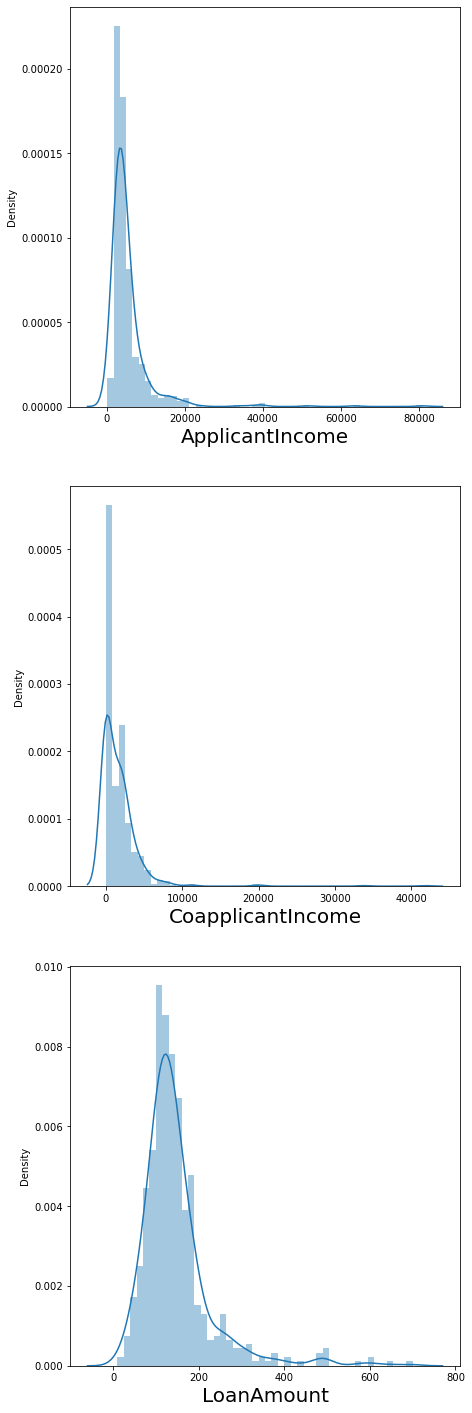

In [18]:
data_cont = data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

plt.figure(figsize = (7,25))
plotnumber = 1

for column in data_cont :
    if plotnumber <=3 :
        ax = plt.subplot(3,1,plotnumber)
        sns.distplot(data_cont[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

In [19]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [20]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [22]:
data_cont = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[data_cont] = scaler.fit_transform(data[data_cont].values)

In [23]:
data.skew()

ApplicantIncome     -0.284434
CoapplicantIncome   -0.102698
LoanAmount          -0.056384
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

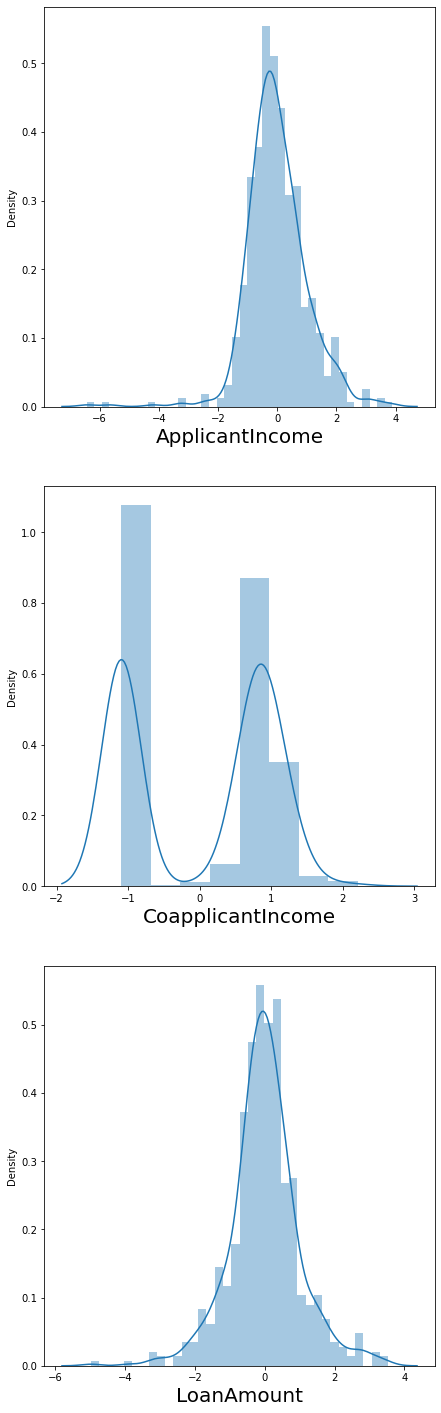

In [24]:
data_cont = data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

plt.figure(figsize = (7,25))
plotnumber = 1

for column in data_cont :
    if plotnumber <=3 :
        ax = plt.subplot(3,1,plotnumber)
        sns.distplot(data_cont[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

### Encoding of dataframe

In [29]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [30]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = enc.fit_transform(data[i].values.reshape(-1,1))

In [31]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,0.552034,-1.095406,0.242177,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.182885,0.710937,-0.030348,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,-0.491695,-1.095406,-1.353694,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,-0.740127,0.882765,-0.160871,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.589878,-1.095406,0.165695,360.0,1.0,2.0,1.0


### Checking multicollinearity

<AxesSubplot:>

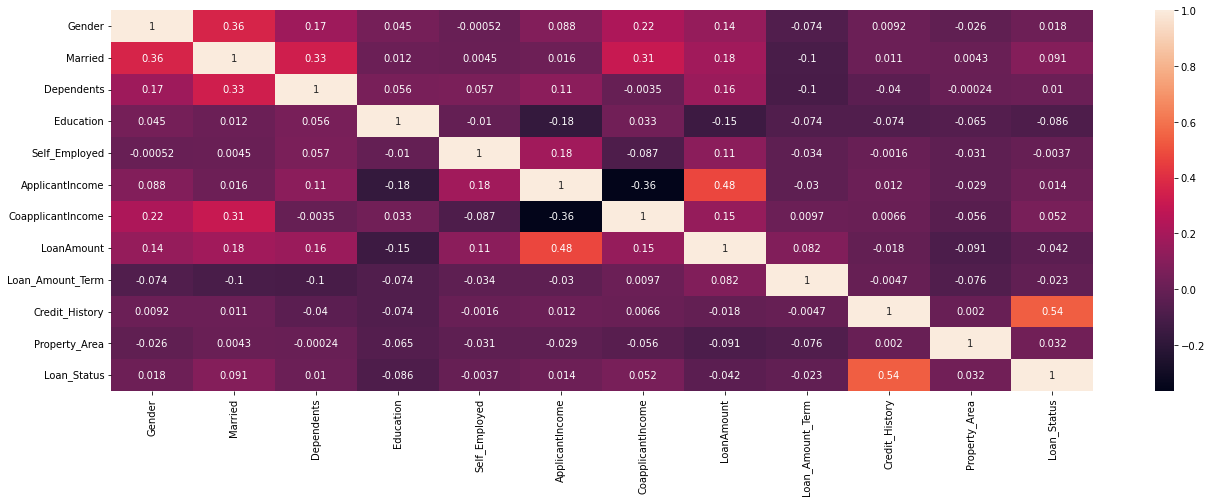

In [32]:
plt.figure(figsize = (22,7))
sns.heatmap(data.corr(), annot = True)

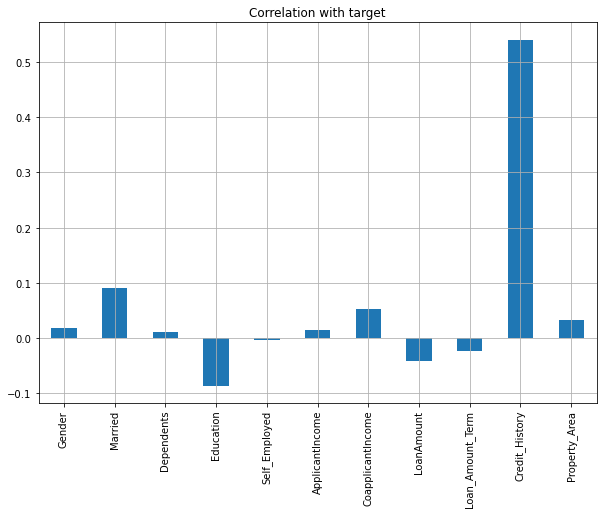

In [33]:
# finding correlation of features with target using corrwith

corr = data.drop('Loan_Status', axis = 1).corrwith(data.Loan_Status)
# Visualize the correlation
corr.plot(kind = 'bar', grid = True, figsize = (10,7),
          title = "Correlation with target")
plt.show()

### Model building for prediction of Loan status

In [34]:
x = data.drop('Loan_Status', axis = 1)
y = data.Loan_Status

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sys
from sklearn import metrics
!{sys.executable} -m pip install xgboost
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score,r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [36]:
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
bg = BaggingClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = xgb.XGBRegressor()
svc = SVC()
svr = SVR()

In [45]:
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = i)
    gb.fit(x_train,y_train)
    y_train_pred = gb.predict(x_train)
    y_test_pred = gb.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {accuracy_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {accuracy_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.8891304347826087
At random state 0, the testing accuracy is : 0.8116883116883117

At random state 1, the training accuracy is : 0.9021739130434783
At random state 1, the testing accuracy is : 0.7727272727272727

At random state 2, the training accuracy is : 0.9130434782608695
At random state 2, the testing accuracy is : 0.7467532467532467

At random state 3, the training accuracy is : 0.8934782608695652
At random state 3, the testing accuracy is : 0.7792207792207793

At random state 4, the training accuracy is : 0.9043478260869565
At random state 4, the testing accuracy is : 0.7662337662337663

At random state 5, the training accuracy is : 0.9021739130434783
At random state 5, the testing accuracy is : 0.7727272727272727

At random state 6, the training accuracy is : 0.9130434782608695
At random state 6, the testing accuracy is : 0.7987012987012987

At random state 7, the training accuracy is : 0.8978260869565218
At random state 7, the te

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 8)
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [47]:
y_test_pred = gb.predict(x_test)
print(f"The accuracy score is {accuracy_score(y_test,y_test_pred)*100:.2f} %")

The accuracy score is 83.77 %


### Cross Validation

In [48]:
test_acc = accuracy_score(y_test,y_test_pred)

for i in range (2,10):
    cv_score = cross_val_score(gb,x,y,cv = i)
    cv_mean  = cv_score.mean()
    print(f"At cv = {i},cv_score = {cv_mean} and accuracy for testing = {test_acc}\n")

At cv = 2,cv_score = 0.7703583061889251 and accuracy for testing = 0.8376623376623377

At cv = 3,cv_score = 0.7866650725330784 and accuracy for testing = 0.8376623376623377

At cv = 4,cv_score = 0.7770032255326373 and accuracy for testing = 0.8376623376623377

At cv = 5,cv_score = 0.7784886045581768 and accuracy for testing = 0.8376623376623377

At cv = 6,cv_score = 0.7801256424900056 and accuracy for testing = 0.8376623376623377

At cv = 7,cv_score = 0.7834564860426928 and accuracy for testing = 0.8376623376623377

At cv = 8,cv_score = 0.77857997265892 and accuracy for testing = 0.8376623376623377

At cv = 9,cv_score = 0.7688026901581888 and accuracy for testing = 0.8376623376623377



In [49]:
cv_score = cross_val_score(gb,x,y,cv = 3)
cv_mean = cv_score.mean()
cv_mean

0.7834130400127531

### Tuning 

In [52]:
# RandomForestClassifier uses DecisionTree algorithm by default
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size = 0.25,random_state = 75)

clf = GradientBoostingClassifier()

params = {'n_estimators':[13,15], # you can play with this and give more options, not just two in this case ie 13 and 15
          'criterion':['friedman_mse','squared_error'],
          'max_depth':[10,15],
          'min_samples_leaf':[5,6],
          'min_samples_split':[10,11]}

grd = GridSearchCV(clf, param_grid = params)
grd.fit(x_train, y_train)
print('best parameters -->',grd.best_params_)

clf = grd.best_estimator_    # reinstantiating with best parameters

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test, y_pred)

print('\nconfusion matrix -->','\n', rf_conf_mat)
print('\nAccuracy rf normal -->', accuracy_score(y_test,y_pred))

best parameters --> {'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 13}

confusion matrix --> 
 [[22 31]
 [12 89]]

Accuracy rf normal --> 0.7207792207792207


In [53]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.65      0.42      0.51        53
         1.0       0.74      0.88      0.81       101

    accuracy                           0.72       154
   macro avg       0.69      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154



In [54]:
# Plot ROC/AUC curve for multiple models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [55]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()

In [58]:
# train, test, split
x = data.drop(columns=['Loan_Status'], axis = 1)
y = data['Loan_Status']

x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size = 0.25,random_state = 44)

# training with all the classifiers
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
gb.fit(x_train,y_train)

print("All models are trained!")

All models are trained!


In [59]:
# all models score captured
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)
gb.score(x_test,y_test)

print("All model test score captured")

All model test score captured


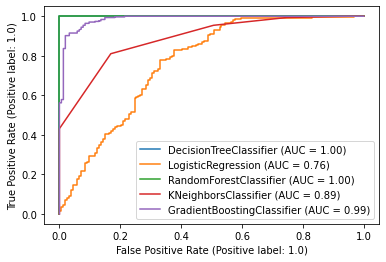

In [60]:
# How well our model works on Training data
disp = plot_roc_curve(dt, x_train, y_train)

plot_roc_curve(lr, x_train, y_train, ax = disp.ax_)  # ax_ = axis with confusion matrix

plot_roc_curve(rf, x_train, y_train, ax = disp.ax_)

plot_roc_curve(kn, x_train, y_train, ax = disp.ax_)

plot_roc_curve(gb, x_train, y_train, ax = disp.ax_)

plt.legend(prop = {'size':10}, loc = 'lower right')

plt.show()

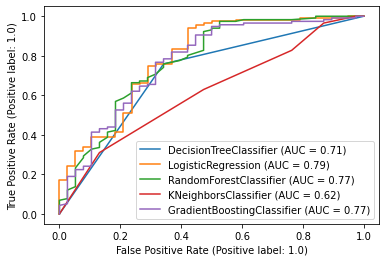

In [61]:
# How well our model works on test data

disp = plot_roc_curve(dt, x_test, y_test)

plot_roc_curve(lr, x_test, y_test, ax = disp.ax_)  # ax_ = axis with confusion matrix

plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)

plot_roc_curve(kn, x_test, y_test, ax = disp.ax_)

plot_roc_curve(gb, x_test, y_test, ax = disp.ax_)

plt.legend(prop = {'size':10}, loc = 'lower right')

plt.show()

#### Gradient Boosting gives the most consistent accuracy. So, we will choose this model for prediction.

In [65]:
import pickle
import joblib

joblib.dump(gb,'Loan prediction.pkl')

['Loan prediction.pkl']